## EDA

In [1]:
import kagglehub
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
from PIL import Image
from collections import defaultdict
import tensorflow as tf
from tensorflow.keras import layers, models

In [2]:
# Download latest version
data = kagglehub.dataset_download("russellchan/healthy-and-wilted-houseplant-images")

print("Path to dataset files:", data)

Using Colab cache for faster access to the 'healthy-and-wilted-houseplant-images' dataset.
Path to dataset files: /kaggle/input/healthy-and-wilted-houseplant-images


In [3]:
print("Files and folders inside dataset:")
print(os.listdir(data))

Files and folders inside dataset:
['houseplant_images']


In [4]:
main_dir = os.path.join(data, "houseplant_images")
print("Folders inside houseplant_images:")
print(os.listdir(main_dir))

Folders inside houseplant_images:
['healthy', 'wilted']


In [5]:
healthy_dir = os.path.join(main_dir, "healthy")
wilted_dir = os.path.join(main_dir, "wilted")

In [6]:
healthy_samples = random.sample(os.listdir(healthy_dir), 5)
wilted_samples = random.sample(os.listdir(wilted_dir), 5)

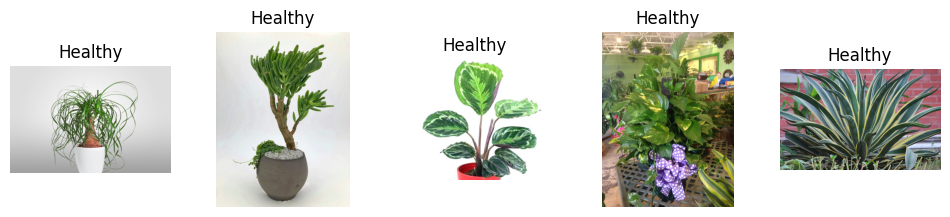

In [7]:
plt.figure(figsize=(12, 5))
for i, img_name in enumerate(healthy_samples):
    img_path = os.path.join(healthy_dir, img_name)
    img = mpimg.imread(img_path)
    plt.subplot(2, 5, i + 1)
    plt.imshow(img)
    plt.axis("off")
    plt.title("Healthy")

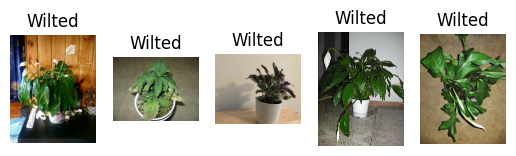

In [8]:
for i, img_name in enumerate(wilted_samples):
    img_path = os.path.join(wilted_dir, img_name)
    img = mpimg.imread(img_path)
    plt.subplot(2, 5, i + 6)
    plt.imshow(img)
    plt.axis("off")
    plt.title("Wilted")

In [9]:
input_dir = '/kaggle/input/healthy-and-wilted-houseplant-images/houseplant_images/healthy'
output_dir = '/content/healthy_resized'
os.makedirs(output_dir, exist_ok=True)

for file in os.listdir(input_dir):
    f_img = os.path.join(input_dir, file)
    img = Image.open(f_img)
    rgb_im = img.convert("RGB").resize((256, 256))
    rgb_im.save(os.path.join(output_dir, file))

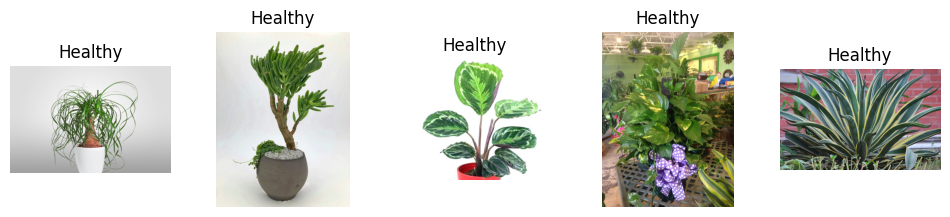

In [10]:
plt.figure(figsize=(12, 5))
for i, img_name in enumerate(healthy_samples):
    img_path = os.path.join(healthy_dir, img_name)
    img = mpimg.imread(img_path)
    plt.subplot(2, 5, i + 1)
    plt.imshow(img)
    plt.axis("off")
    plt.title("Healthy")

In [11]:
f = os.path.join(data, "houseplant_images", "wilted")
output_dir = '/content/wilted_resized'
os.makedirs(output_dir, exist_ok=True)

for file in os.listdir(f):
    f_img = os.path.join(f, file)
    img = Image.open(f_img)
    rgb_im = img.convert("RGB").resize((256, 256))
    rgb_im.save(os.path.join(output_dir, file))

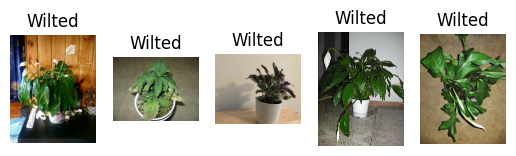

In [12]:
for i, img_name in enumerate(wilted_samples):
    img_path = os.path.join(wilted_dir, img_name)
    img = mpimg.imread(img_path)
    plt.subplot(2, 5, i + 6)
    plt.imshow(img)
    plt.axis("off")
    plt.title("Wilted")

In [13]:
def find_duplicates(folder_path):
    hashes = defaultdict(list)
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        try:
            with Image.open(file_path) as img:
                img_hash = imagehash.average_hash(img)
                hashes[str(img_hash)].append(filename)
        except:
            pass
    duplicates = {h: files for h, files in hashes.items() if len(files) > 1}
    return duplicates

healthy_path = os.path.join(data, "houseplant_images", "healthy")
wilted_path  = os.path.join(data, "houseplant_images", "wilted")

healthy_dupes = find_duplicates(healthy_path)
wilted_dupes  = find_duplicates(wilted_path)

print("Healthy duplicates:", len(healthy_dupes))
print("Wilted duplicates:", len(wilted_dupes))

Healthy duplicates: 0
Wilted duplicates: 0


## There were duplicate images, but they were deleted and we rerun the cells :

In [14]:
# folder = os.path.join(data, "houseplant_images", "healthy")

# duplicate_groups = [
#     ['healthy_329.jpg', 'healthy_102.jpg'],
#     ['healthy_189.jpg', 'healthy_252.jpg', 'healthy_304.jpg'],
#     ['healthy_250.jpg', 'healthy_187.jpg'],
#     ['healthy_435.jpg', 'healthy_090.jpg'],
#     ['healthy_377.jpg', 'healthy_358.jpg'],
#     ['healthy_191.jpg', 'healthy_300.jpg'],
#     ['healthy_042.jpg', 'healthy_089.jpg'],
#     ['healthy_002.jpg', 'healthy_150.jpg'],
#     ['healthy_401.jpg', 'healthy_246.jpg'],
#     ['healthy_207.jpg', 'healthy_285.jpg'],
#     ['healthy_034.jpg', 'healthy_182.jpg'],
#     ['healthy_335.jpg', 'healthy_061.jpg'],
#     ['healthy_444.jpg', 'healthy_215.jpg'],
#     ['healthy_396.jpg', 'healthy_361.jpg'],
#     ['healthy_050.jpg', 'healthy_202.jpg'],
#     ['healthy_130.jpg', 'healthy_357.jpg'],
#     ['healthy_255.jpg', 'healthy_176.jpg'],
#     ['healthy_389.jpg', 'healthy_349.jpg'],
#     ['healthy_347.jpg', 'healthy_371.jpg'],
#     ['healthy_136.jpg', 'healthy_206.jpg'],
#     ['healthy_161.jpg', 'healthy_238.jpg'],
#     ['healthy_400.jpg', 'healthy_175.jpg'],
#     ['healthy_205.jpg', 'healthy_306.jpg'],
#     ['healthy_109.jpg', 'healthy_195.jpg'],
#     ['healthy_085.jpg', 'healthy_442.jpg'],
#     ['healthy_439.jpg', 'healthy_177.jpg'],
#     ['healthy_081.jpg', 'healthy_030.jpg'],
#     ['healthy_046.jpg', 'healthy_254.jpg'],
#     ['healthy_015.jpg', 'healthy_146.jpg'],
#     ['healthy_072.jpg', 'healthy_424.jpg']
# ]

# deleted = 0

# for group in duplicate_groups:
#     for file in group[1:]:
#         file_path = os.path.join(folder, file)
#         if os.path.exists(file_path):
#             os.remove(file_path)
#             deleted += 1

# print(f"Deleted {deleted} duplicate images from healthy folder.")

In [15]:
# folder = os.path.join(data, "houseplant_images", "wilted")

# duplicate_groups = [
#     ['wilted_085.jpg', 'wilted_389.jpg'],
#     ['wilted_051.jpg', 'wilted_444.jpg'],
#     ['wilted_182.jpg', 'wilted_222.jpg'],
#     ['wilted_310.jpg', 'wilted_001.jpg', 'wilted_418.jpg'],
#     ['wilted_352.jpg', 'wilted_111.jpg'],
#     ['wilted_285.jpg', 'wilted_086.jpg'],
#     ['wilted_326.jpg', 'wilted_013.jpg'],
#     ['wilted_421.jpg', 'wilted_148.jpg'],
#     ['wilted_404.jpg', 'wilted_011.jpg'],
#     ['wilted_269.jpg', 'wilted_270.jpg'],
#     ['wilted_055.jpg', 'wilted_184.jpg'],
#     ['wilted_380.jpg', 'wilted_201.jpg', 'wilted_345.jpg'],
#     ['wilted_304.jpg', 'wilted_373.jpg'],
#     ['wilted_405.jpg', 'wilted_246.jpg'],
#     ['wilted_047.jpg', 'wilted_308.jpg', 'wilted_441.jpg'],
#     ['wilted_118.jpg', 'wilted_173.jpg'],
#     ['wilted_054.jpg', 'wilted_357.jpg'],
#     ['wilted_406.jpg', 'wilted_008.jpg', 'wilted_327.jpg'],
#     ['wilted_369.jpg', 'wilted_414.jpg'],
#     ['wilted_401.jpg', 'wilted_431.jpg'],
#     ['wilted_302.jpg', 'wilted_009.jpg', 'wilted_038.jpg'],
#     ['wilted_221.jpg', 'wilted_024.jpg'],
#     ['wilted_119.jpg', 'wilted_172.jpg'],
#     ['wilted_156.jpg', 'wilted_303.jpg'],
#     ['wilted_079.jpg', 'wilted_135.jpg'],
#     ['wilted_107.jpg', 'wilted_183.jpg'],
#     ['wilted_159.jpg', 'wilted_354.jpg'],
#     ['wilted_248.jpg', 'wilted_063.jpg'],
#     ['wilted_143.jpg', 'wilted_353.jpg'],
#     ['wilted_036.jpg', 'wilted_076.jpg'],
#     ['wilted_316.jpg', 'wilted_390.jpg'],
#     ['wilted_072.jpg', 'wilted_037.jpg']
# ]

# deleted = 0

# for group in duplicate_groups:
#     for file in group[1:]:
#         file_path = os.path.join(folder, file)
#         if os.path.exists(file_path):
#             os.remove(file_path)
#             deleted += 1

# print(f"Deleted {deleted} duplicate images from wilted folder.")

In [16]:
healthy_path = os.path.join(data, "houseplant_images", "healthy")
wilted_path  = os.path.join(data, "houseplant_images", "wilted")

num_healthy = len([f for f in os.listdir(healthy_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))])
num_wilted  = len([f for f in os.listdir(wilted_path)  if f.lower().endswith(('.jpg', '.jpeg', '.png'))])

total = num_healthy + num_wilted
total

904

## Modeling

In [17]:
main_dir     = os.path.join(data, "houseplant_images")
IMG_SIZE     = 256
BATCH_SIZE   = 64
VAL_SPLIT    = 0.2
SEED         = 1337

In [18]:
sub_train = tf.keras.utils.image_dataset_from_directory(
    main_dir,
    labels="inferred",
    label_mode="binary",
    validation_split=VAL_SPLIT,
    subset='training',
    seed = SEED,
    image_size = (IMG_SIZE,IMG_SIZE),
    batch_size = BATCH_SIZE,
    shuffle = True
)

Found 904 files belonging to 2 classes.
Using 724 files for training.


In [19]:
sub_val = tf.keras.utils.image_dataset_from_directory(
    main_dir,
    labels="inferred",
    label_mode="binary",
    validation_split=VAL_SPLIT,
    subset='validation',
    seed = SEED,
    image_size = (IMG_SIZE,IMG_SIZE),
    batch_size = BATCH_SIZE,
    shuffle = False
)

Found 904 files belonging to 2 classes.
Using 180 files for validation.


In [20]:
train_ds = sub_train.take(15)
val_ds = sub_val.take(10)

In [21]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(AUTOTUNE)
val_ds = val_ds.cache().prefetch(AUTOTUNE)

In [22]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.05),
    tf.keras.layers.RandomZoom(0.05)
])

rescale = tf.keras.layers.Rescaling(1./255)

## Train the first model

In [23]:
model1 = models.Sequential([
    layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3)),
    rescale,
    data_augmentation,

    layers.Conv2D(16, 3, padding="same", activation ="relu"),
    layers.MaxPooling2D(),

    layers.Conv2D(32, 3, padding="same", activation ="relu"),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(32, activation = "relu"),

    layers.Dropout(0.3),
    layers.Dense(1, activation = "sigmoid")
])

model1.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss="binary_crossentropy",
    metrics=["accuracy", tf.keras.metrics.AUC(name = "auc")]
)

model1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 256, 256, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 131072)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │     4,194,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,199,457 (16.02 MB)

 Trainable params: 4,199,457 (16.02 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
history1 = model1.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,
    verbose =1
)

Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 15s 452ms/step - accuracy: 0.5022 - auc: 0.4805 - loss: 3.0186 - val_accuracy: 0.1667 - val_auc: 0.0000e+00 - val_loss: 0.6875
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.5628 - auc: 0.5518 - loss: 0.6915 - val_accuracy: 0.3278 - val_auc: 0.0000e+00 - val_loss: 0.6793
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.5827 - auc: 0.5689 - loss: 0.6880 - val_accuracy: 0.6444 - val_auc: 0.0000e+00 - val_loss: 0.6396
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.6548 - auc: 0.6489 - loss: 0.6731 - val_accuracy: 0.3000 - val_auc: 0.0000e+00 - val_loss: 0.6627
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.5845 - auc: 0.5672 - loss: 0.6837 - val_accuracy: 0.8333 - val_auc: 0.0000e+00 - val_loss: 0.4956
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.6423 - auc: 0.6572 - loss: 0.6645 - val_accuracy: 0.3889 - val_auc: 0.0000e+00 - val_loss: 0.6233
Epoch 7/10
12/12 ━━━

In [25]:
model1.evaluate(val_ds)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.1437 - auc: 0.0000e+00 - loss: 0.6822


[0.6793062090873718, 0.1388888955116272, 0.0]

## Train model 2

In [26]:
model2 = models.Sequential([
    layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3)),
    rescale,
    data_augmentation,

    layers.Conv2D(16, 3, padding="same", activation ="relu"),
    layers.MaxPooling2D(),

    layers.Conv2D(32, 3, padding="same", activation ="relu"),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 3, padding="same", activation ="relu"),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(64, activation = "relu"),

    layers.Dropout(0.3),
    layers.Dense(1, activation = "sigmoid")
])

model2.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.00005),
    loss="binary_crossentropy",
    metrics=["accuracy", tf.keras.metrics.AUC(name = "auc")]
)

model2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 256, 256, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 128, 128, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 128, 128, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │     4,194,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,218,017 (16.09 MB)

 Trainable params: 4,218,017 (16.09 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True
)

In [28]:
history2 = model2.fit(
    train_ds,
    callbacks=[callback],
    validation_data=val_ds,
    epochs=10,
    verbose =1
)

Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 125ms/step - accuracy: 0.4632 - auc: 0.4826 - loss: 0.7020 - val_accuracy: 0.0444 - val_auc: 0.0000e+00 - val_loss: 0.7558
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.5454 - auc: 0.6442 - loss: 0.6744 - val_accuracy: 0.4111 - val_auc: 0.0000e+00 - val_loss: 0.7115
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.5791 - auc: 0.6756 - loss: 0.6643 - val_accuracy: 0.5833 - val_auc: 0.0000e+00 - val_loss: 0.6881
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.6576 - auc: 0.7456 - loss: 0.6418 - val_accuracy: 0.5611 - val_auc: 0.0000e+00 - val_loss: 0.6936
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.6575 - auc: 0.7630 - loss: 0.6194 - val_accuracy: 0.7611 - val_auc: 0.0000e+00 - val_loss: 0.5976
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.6761 - auc: 0.7462 - loss: 0.6154 - val_accuracy: 0.8000 - val_auc: 0.0000e+00 - val_loss: 0.5552
Epoch 7/10
12/12 ━━━━

In [29]:
model2.evaluate(val_ds)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8391 - auc: 0.0000e+00 - loss: 0.4862


[0.484848290681839, 0.8500000238418579, 0.0]

## Train the 3th model

In [30]:
model3 = models.Sequential([
    layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3)),
    rescale,
    data_augmentation,

    layers.Conv2D(64, 3, padding="same", activation ="relu"),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 3, padding="same", activation ="relu"),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 3, padding="same", activation ="relu"),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(64, activation = "relu"),

    layers.Dropout(0.3),
    layers.Dense(1, activation = "sigmoid")
])

model3.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.00005),
    loss="binary_crossentropy",
    metrics=["accuracy", tf.keras.metrics.AUC(name = "auc")]
)

model3.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 256, 256, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │     4,194,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,270,081 (16.29 MB)

 Trainable params: 4,270,081 (16.29 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
history3 = model3.fit(
    train_ds,
    callbacks=[callback],
    validation_data=val_ds,
    epochs=50,
    verbose =1
)

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 361ms/step - accuracy: 0.5138 - auc: 0.5433 - loss: 0.6957 - val_accuracy: 0.0333 - val_auc: 0.0000e+00 - val_loss: 0.7577
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 150ms/step - accuracy: 0.5605 - auc: 0.7082 - loss: 0.6647 - val_accuracy: 0.4333 - val_auc: 0.0000e+00 - val_loss: 0.7235
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 149ms/step - accuracy: 0.6055 - auc: 0.6940 - loss: 0.6507 - val_accuracy: 0.7444 - val_auc: 0.0000e+00 - val_loss: 0.6303
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 149ms/step - accuracy: 0.6808 - auc: 0.7593 - loss: 0.6149 - val_accuracy: 0.7944 - val_auc: 0.0000e+00 - val_loss: 0.5800
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 151ms/step - accuracy: 0.6896 - auc: 0.7581 - loss: 0.6001 - val_accuracy: 0.8333 - val_auc: 0.0000e+00 - val_loss: 0.5217
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 150ms/step - accuracy: 0.6818 - auc: 0.7439 - loss: 0.5959 - val_accuracy: 0.8611 - val_auc: 0.0000e+00 - val_loss: 0.4961
Epoch 7/50
12/12

In [32]:
model3.evaluate(val_ds)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.8811 - auc: 0.0000e+00 - loss: 0.4636


[0.4638718366622925, 0.8833333253860474, 0.0]

In [33]:
print(model1.evaluate(val_ds))
print(model2.evaluate(val_ds))
print(model3.evaluate(val_ds))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.1437 - auc: 0.0000e+00 - loss: 0.6822
[0.6793062090873718, 0.1388888955116272, 0.0]
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8391 - auc: 0.0000e+00 - loss: 0.4862
[0.484848290681839, 0.8500000238418579, 0.0]
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.8811 - auc: 0.0000e+00 - loss: 0.4636
[0.4638718366622925, 0.8833333253860474, 0.0]
